# Titanic - DecisionTree e Features Numéricas
Este notebook cria um modelo baseado no dataset do Titanic e usando uma DecisionTree. Para esse caso específico, estamos usando apenas features numéricas.

Vamos começar importando as bibliotecas básicas que vamos usar.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Próximo passo: carregando os dados a partir dos CSVs disponibilizados no Kaggle. Estamos usando a biblioteca pandas para esse propósito.

In [6]:
# Vamos iniciar o notebook importanto o Dataset
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")
sample_submission_df  = pd.read_csv("../input/gender_submission.csv")

# Podemos observar as primeiras linhas dele.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos usar a biblioteca scikit-learn para treinar um modelo. Como a maior parte das bibliotecas para Machine Learning, o tratamento é de dados numéricos. Dessa forma, vamos isolar as colunas numéricas. As colunas não numéricas serão tratadas no futuro.

A Feature `Age` também é numérica, mas algumas linhas não estão preenchidas. Vamos tratá-la posteriormente junto com as colunas não numéricas.


In [7]:
numeric_features = ['Pclass', 'SibSp', 'Parch', 'Fare']

É possível isolar apenas um subcojunto das colunas do DataFrame pandas, passando uma lista como index da subscription.

In [8]:
titanic_df[numeric_features].head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


Apesar de usarmos pandas para ler e manipular os dados, a biblioteca scikit-learn trabalha os dados como se fossem matrizes e arrays numpy. Vamos portanto converter os dados que nos interessam em matrizes e arrays numpy.

Como convenção, normalmente representa-se as features do modelo com o nome `X` e a variável alvo, que estamos tentando prever, de `y`.

In [9]:
train_X = titanic_df[numeric_features].as_matrix()
print(train_X.shape)
train_y = titanic_df['Survived'].as_matrix()
print(train_y.shape)

(891, 4)
(891,)


Ok. A matriz `train_X` tem 891 linhas e 4 colunas. O array `train_y` tem 891 valores, representando cada uma das 891 amostras. Vamos visualizá-los, apenas para fins didáticos.

In [10]:
train_X

array([[  3.    ,   1.    ,   0.    ,   7.25  ],
       [  1.    ,   1.    ,   0.    ,  71.2833],
       [  3.    ,   0.    ,   0.    ,   7.925 ],
       ..., 
       [  3.    ,   1.    ,   2.    ,  23.45  ],
       [  1.    ,   0.    ,   0.    ,  30.    ],
       [  3.    ,   0.    ,   0.    ,   7.75  ]])

In [11]:
train_y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

Ótimo! Vamos agora trabalhar com o nosso modelo. Nesse caso específico, vamos usar uma DecisionTree.

O parâmetro random_state é para garantir que sempre que executarmos esse código tenhamos os mesmos resultados. O parâmetro max_depth é um hiperparâmetro ajustável, com o qual vamos brincar.

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy')


Criamos a estrutura básica do modelo. Hora de treiná-lo.

In [20]:
dt_clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

Com nosso modelo treinado, vamos avaliar a qualidade dele. Esse modelo de DecisionTree usa como métrica de score a acurácia, ou seja: qual a taxa de acerto.

In [15]:
dt_clf.score(train_X, train_y)

0.74747474747474751

Quer ver um efeito colateral bem legal de se usar uma Decision Tree? Ele consegue nos mostrar quais as features mais importantes para o modelo. Isso pode nos ajudar a entender o que está acontecendo melhor e explicar para o nosso cliente, chefe, etc. Não é possível fazer isso com todo tipo de modelo (redes neurais, por exemplo).

In [18]:
dt_clf.feature_importances_

array([ 0.34259778,  0.05104721,  0.07127603,  0.53507899])

In [17]:
# Se voce tiver curiosidade em ver a arvore...
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, feature_names=numeric_features, out_file='/tmp/x.dot', filled=True, class_names=True, impurity=False, proportion=True)
!dot -Tpng /tmp/x.dot -o /tmp/x.png

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/x.dot'

Nesse caso específico, qual é a feature mais importante do nosso modelo? Isso faz sentido pra você?

## Exercício
Você consegue melhorar a acurácia desse modelo? Faça testes usando diferentes valores para max_depth. Trace um gráfico com max_depth variando entre 1 e 20. No eixo X do gráfico, qual o parâmetro max_depth usado. No eixo y a acurácia. Abaixo, um starter code para você brincar. ;)

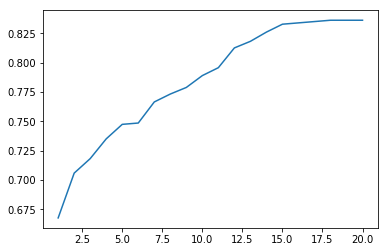

In [22]:
# cria um array cuja posição 1 é 1, posição 2 é 2, ...
max_depth_arr = np.arange(1, 21)
# criar um array com 1000 posições zeradas
accuracy_arr = np.zeros(20)

for i, max_depth in enumerate(max_depth_arr):
    ## calcula accuracy usando o max_depth em questao
    
    
    from sklearn.tree import DecisionTreeClassifier
    dt_clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth, criterion='entropy')
    dt_clf.fit(train_X, train_y)
    
    accuracy_arr[i] = dt_clf.score(train_X, train_y) #0 # coloque aqui o seu calculo de accuracy

plt.plot(max_depth_arr, accuracy_arr);    

Pergunta: qual o melhor max_depth que você encontrou? Vamos usá-lo em seguida.

In [38]:
optimal_max_depth = 18 # coloque aqui o max_depth que voce encontrou

In [39]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=optimal_max_depth)
dt_clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [41]:
dt_clf.score(train_X, train_y)


0.83613916947250277

Agora que temos o nosso modelo já com o hiperparâmetro tunado, vamos nos preparar para submeter o arquivo. Antes de mais nada: como fazemos pra fazer o nosso modelo "prever" um resultado? Vamos usar o próprio dataset de treino para ver.

In [25]:
train_X[0:5]

array([[  3.    ,   1.    ,   0.    ,   7.25  ],
       [  1.    ,   1.    ,   0.    ,  71.2833],
       [  3.    ,   0.    ,   0.    ,   7.925 ],
       [  1.    ,   1.    ,   0.    ,  53.1   ],
       [  3.    ,   0.    ,   0.    ,   8.05  ]])

In [26]:
train_y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [27]:
dt_clf.predict(train_X[0:5])

array([0, 1, 0, 1, 0], dtype=int64)

Ok, já sabemos como usar o modelo para prever se um determinado passageiro sobreviveria, com base em algumas de suas características (features). O próximo passo é trabalhar com o dataset de teste que o Kaggle nos disponibiliza.

In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


O dataset de test é muito parecido com o dataset de treinamento (ainda bem!). A diferença aqui é que falta a coluna Survived, que é justamente a que precisamos prever. Vamos começar a preparar os dados.

Infelizmente no dataset de teste, um dos passageiros está com Fare vazio. :-(

Para conseguirmos evoluir, vamos setar o Fare vazio para 0.0

In [30]:
test_df['Fare'] = test_df['Fare'].fillna(0)

Lembra que o sklean trabalha com matrizes numpy, certo?

In [31]:
test_X = test_df[numeric_features].as_matrix()
print(test_X.shape)

(418, 4)


In [32]:
test_X

array([[  3.    ,   0.    ,   0.    ,   7.8292],
       [  3.    ,   1.    ,   0.    ,   7.    ],
       [  2.    ,   0.    ,   0.    ,   9.6875],
       ..., 
       [  3.    ,   0.    ,   0.    ,   7.25  ],
       [  3.    ,   0.    ,   0.    ,   8.05  ],
       [  3.    ,   1.    ,   1.    ,  22.3583]])

Legal. Temos 418 amostras. Vamos usar o nosso modelo pra prever a sobrevivência dessas 418 pessoas.

In [33]:
y_pred = dt_clf.predict(test_X)

In [34]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

Ótimo! Já temos aquilo que precisávamos. Próximo passo agora é empacotar num arquivo CSV e submeter no Kaggle.

In [35]:
sample_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [36]:
sample_submission_df['PassengerId'] = test_df['PassengerId']
sample_submission_df['Survived'] = y_pred
sample_submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0


In [37]:
sample_submission_df.to_csv('basic_decision_tree.csv', index=False)

Por favor, anote aqui para referência: quanto foi o seu score de treinamento do modelo? Quanto foi o seu score na submissão do Kaggle?

In [43]:
CV = 0.83613
LB = 0.64115
